# Regresion lineal simple

In [2]:
# Cargar bibliotecas 
import matplotlib.pyplot as plt 
import pandas as pd
import pylab as pl 
import numpy as np 
import os 
import warnings 

# Desactivar advertencias
warnings.filterwarnings("ignore")  # "ignore" para silenciar las advertencias

In [4]:
# Cargar base de datos 
df=pd.read_excel("FuelConsumptionCo2.xlsx")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230


In [6]:
#Exploración de datos 
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,945.0,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,2022.0,3.201058,5.670899,12.515767,9.374603,11.102222,27.222222,259.410582
std,0.0,1.374256,1.932837,3.452369,2.290217,2.878074,7.684409,64.486225
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,214.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,258.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,301.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000


In [8]:
# Selección de las variable 
cdf=df[["ENGINESIZE","CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,8.6,200
1,3.5,6,11.2,263
2,2.0,4,9.9,232
3,2.0,4,10.3,242
4,2.0,4,9.8,230
5,2.0,4,9.8,231
6,3.0,6,11.0,256
7,3.0,6,11.2,261
8,2.0,4,8.7,205


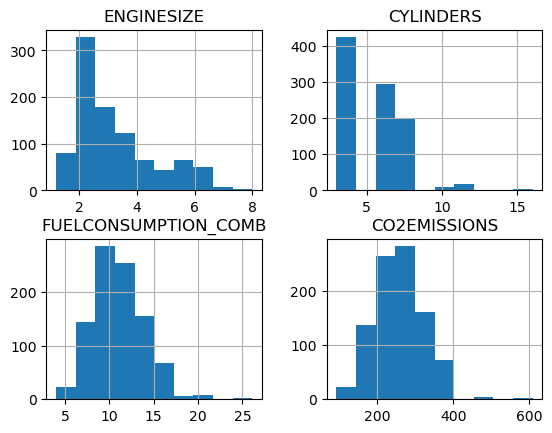

In [10]:
# Visualización de las variables en un histograma 
viz=cdf[["ENGINESIZE","CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
viz.hist()
plt.show()

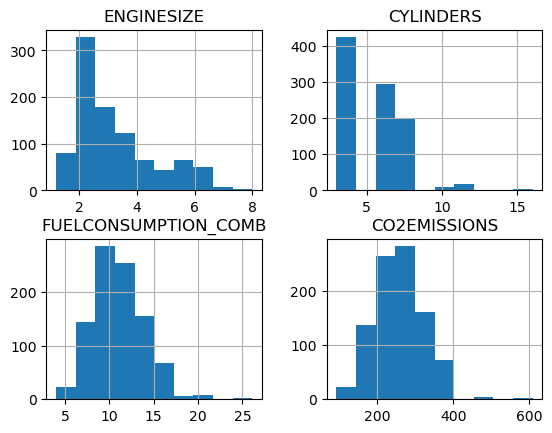

In [12]:
# Visualización de las variables en un histograma 
viz=cdf[["ENGINESIZE","CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
viz.hist()
plt.show()

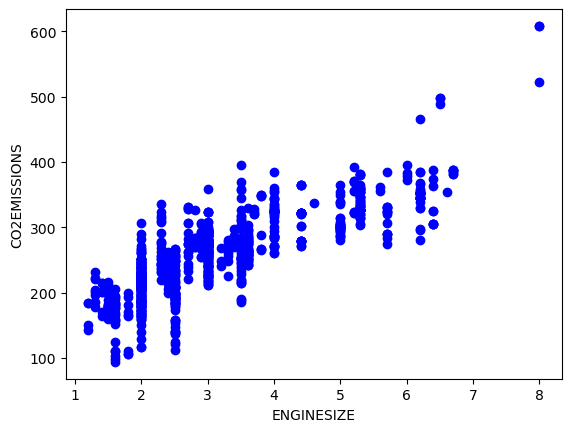

In [14]:
# Graficación del tamaño del motor vs las emisiones de carbono emitidas 
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color="blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

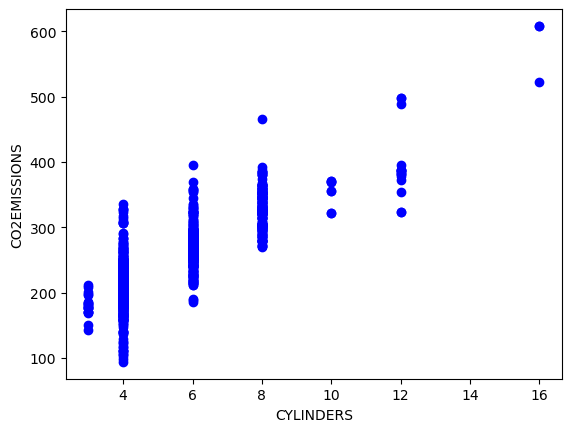

In [16]:
# Graficación del número de cilindros vs las emisiones de carbono emitidas 
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color="blue")
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

Con estas gráficas preliminares podemos concluir que el FUELCONSUMPTION_COMB, sigue más el modelo de una regresión lineal.

In [19]:
# Creación del tamaño de muestra que se usara para train(el entrenamiento)
msk=np.random.rand(len(df))<=0.80
msk

array([False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,

In [21]:
# Definición de train
train=cdf[msk]
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
2,2.0,4,9.9,232
3,2.0,4,10.3,242
4,2.0,4,9.8,230
5,2.0,4,9.8,231
7,3.0,6,11.2,261
...,...,...,...,...
938,2.0,4,9.5,222
940,2.0,4,9.4,219
941,2.0,4,9.4,219
942,2.0,4,9.9,232


In [23]:
# Definición de test
test=cdf[~msk]
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,8.6,200
1,3.5,6,11.2,263
6,3.0,6,11.0,256
16,5.2,12,13.8,324
18,4.0,8,11.5,270
...,...,...,...,...
929,1.5,4,7.6,178
934,2.0,4,8.3,193
935,2.0,4,9.1,212
939,2.0,4,9.3,217


In [25]:
# Importación y aplicación del modelo lineal 
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train [["FUELCONSUMPTION_COMB"]])
train_y=np.asanyarray(train [["CO2EMISSIONS"]])
regr.fit(train_x, train_y)

LinearRegression()

In [27]:
# Imprimir coeficientes 
print("Coeficientes de pendientes", regr.coef_)
print("Coeficientes de intercepto ", regr.intercept_)

Coeficientes de pendientes [[21.72610945]]
Coeficientes de intercepto  [18.0537821]


Text(0, 0.5, 'Emision de CO2')

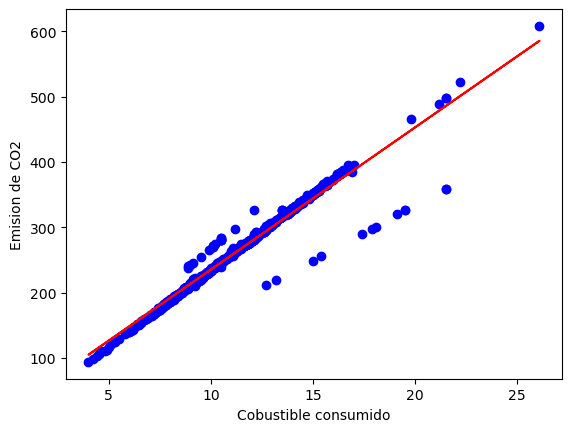

In [29]:
# Graficar la pendiente 
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color="blue")
plt.plot(train_x, regr.coef_[0][0]*train_x+regr.intercept_[0], "-r")
plt.xlabel("Cobustible consumido")
plt.ylabel("Emision de CO2")

Como vemos la línea de la pendiente y de los resultados se están siguiendo de una forma muy fiel, si bien existen unos datos por debajo de esta, los mismos podrían resultar de otras variables como el tamaño del motor o el número de cilindros.

In [34]:
# Importación y aplicación de la R cuadrada
from sklearn.metrics import r2_score 
test_x=np.asanyarray(test [["FUELCONSUMPTION_COMB"]])
test_y=np.asanyarray(test [["CO2EMISSIONS"]])
test_y_hat= regr.predict(test_x)
test_y_hat

array([[204.89832341],
       [261.38620799],
       [257.0409861 ],
       [317.87409257],
       [267.90404082],
       [235.31487664],
       [252.69576421],
       [317.87409257],
       [213.58876719],
       [289.63015028],
       [207.07093435],
       [222.27921097],
       [291.80276122],
       [226.62443286],
       [270.07665177],
       [317.87409257],
       [317.87409257],
       [317.87409257],
       [233.1422657 ],
       [241.83270948],
       [320.04670351],
       [359.15370053],
       [202.72571246],
       [585.10523886],
       [274.42187366],
       [189.69004679],
       [259.21359704],
       [228.79704381],
       [237.48748759],
       [267.90404082],
       [250.52315326],
       [278.76709555],
       [278.76709555],
       [291.80276122],
       [346.11803486],
       [254.86837515],
       [265.73142988],
       [200.55310151],
       [215.76137813],
       [233.1422657 ],
       [261.38620799],
       [320.04670351],
       [343.94542391],
       [170

In [36]:
# Impresión de los coeficientes
print ("Media absoluta de error: %2f" % np.mean(np.absolute(test_y_hat - test_y)))
print ("Suma residual de los cuadrados (MSE): %2f" % np.mean((test_y_hat - test_y)**2))
print ("R2-score: %.2f" % r2_score(test_y_hat,test_y))

Media absoluta de error: 6.819876
Suma residual de los cuadrados (MSE): 223.346370
R2-score: 0.95


La R cuadrada es 0.95 lo cual indica excelentes resultados de predicción.

# Regresión lineal múltiple

Con el fin de ver si podemos ser más precisos en nuestra prediciones haremos una regresión lineal múltiple.

In [43]:
cdf=df [["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,9.9,7.0,8.6,200
1,3.5,6,12.6,9.4,11.2,263
2,2.0,4,11.0,8.6,9.9,232
3,2.0,4,11.3,9.1,10.3,242
4,2.0,4,11.2,8.0,9.8,230
5,2.0,4,11.3,8.1,9.8,231
6,3.0,6,12.3,9.4,11.0,256
7,3.0,6,12.3,9.8,11.2,261
8,2.0,4,10.0,7.2,8.7,205


In [45]:
x=np.asanyarray(train [["ENGINESIZE","CYLINDERS", "FUELCONSUMPTION_COMB"]])
y=np.asanyarray(train [["CO2EMISSIONS"]])
regr.fit(x,y)
print("Coeficientes de varibles inpendientes", regr.coef_)
print("Coeficientes de intercepto ", regr.intercept_)

Coeficientes de varibles inpendientes [[ 1.27893985  2.89721649 19.65652114]]
Coeficientes de intercepto  [20.61721473]


CO2EMISSION=20.61 +1.27(ENGINESIZE)+2.89(CYLINDERS)+19.65(FUELCONSUMPTION_COMB)


In [50]:
y_hat=regr.predict(test[["ENGINESIZE","CYLINDERS", "FUELCONSUMPTION_COMB"]])
x=np.asanyarray(test [["ENGINESIZE","CYLINDERS", "FUELCONSUMPTION_COMB"]])
y=np.asanyarray(test [["CO2EMISSIONS"]])

In [52]:
print ("Media absoluta de error: %2f" % np.mean(np.absolute(y_hat - y)))
print ("Suma residual de los cuadrados (MSE): %2f" % np.mean((y_hat -y)**2))
print ("R2-score: %.2f" % r2_score(y_hat,y))

Media absoluta de error: 7.220512
Suma residual de los cuadrados (MSE): 209.437894
R2-score: 0.95


Vemos que los resultados de R cuadrada, media absoluta de error y MSE, son casi idénticos a solo tomar en cuenta el consumo de combustible, por lo cual tomarlos en consideración no mejora el sistema.